In [5]:
# importing the necessary files

import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import h5py

In [6]:
encoded_train = np.load("/content/drive/MyDrive/thermal_images/encoded_train_images.npy")
encoded_val = np.load("/content/drive/MyDrive/thermal_images/encoded_val_images.npy")

In [7]:
# Use t-SNE to reduce the dimensionality of the encoded test data
encoded_train_data = encoded_train
tsne = TSNE(n_components=2, perplexity=1, learning_rate=1000,n_iter = 1000,metric = 'euclidean',init='random')
tsne_train_data = tsne.fit_transform(encoded_train_data.reshape(encoded_train_data.shape[0], -1))

In [8]:
# Use t-SNE to reduce the dimensionality of the encoded test data
encoded_test_data = encoded_val
tsne = TSNE(n_components=2, perplexity=1, learning_rate=1000,n_iter = 1000,metric = 'euclidean',init='random')
tsne_test_data = tsne.fit_transform(encoded_test_data.reshape(encoded_test_data.shape[0], -1))

In [9]:
np.save("train_features_tsne.npy", tsne_train_data)
np.save("test_features_tsne.npy", tsne_test_data)

In [ ]:
import plotly.express as px
fig = px.scatter(x=tsne_train_data[:, 0], y=tsne_train_data[:, 1])
fig.update_layout(
    title="t-SNE visualization",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

In [10]:
import numpy as np
from sklearn.cluster import KMeans

# Load the train and valid data
train_data = np.load('train_features_tsne.npy')
valid_data = np.load( 'test_features_tsne.npy')

# Define the number of clusters
n_clusters = 4

# Cluster the train and valid data using KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_clusters = kmeans.fit_predict(train_data)
valid_clusters = kmeans.predict(valid_data)

# Save the cluster labels for the train and valid data
np.save('train_clustersK.npy', train_clusters)
np.save('valid_clustersK.npy', valid_clusters)

#tensorboard

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


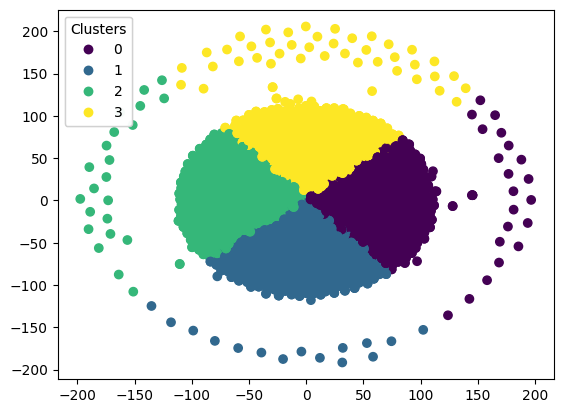

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the train data and cluster labels
train_data = np.load('train_features_tsne.npy')
train_clusters = np.load('train_clustersK.npy')

# Plot the clusters
fig, ax = plt.subplots()
scatter = ax.scatter(train_data[:, 0], train_data[:, 1], c=train_clusters, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

In [11]:
import numpy as np
from sklearn.metrics import silhouette_score

# Load the train data and cluster labels
train_data = np.load('train_features_tsne.npy')
train_clusters = np.load('train_clustersK.npy')

# Calculate the silhouette score
silhouette_avg = silhouette_score(train_data, train_clusters)
print("The silhouette score is:", silhouette_avg)


The silhouette score is: 0.34383318
